In [1]:
import pandas as pd
import anndata as ad
import tarfile
import scanpy as sc
from scipy.io import mmread
import numpy as np
from scipy.stats import median_abs_deviation
import matplotlib.pyplot as plt

# Preprocessing of sample C3L-00004-T1_CPT0001540013

## Read the files (skip after first time)

Save the data from the website: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM7710073
Load the following code.
Change the file path when necessary

In [2]:
#edit based on your file path

file_path1 = "C:/Users/gajaj/Downloads/GSM7710073_C3L-00004-T1_CPT0001540013_snRNA_ccRCC.tar.gz"
output_dir1 = 'C:/Users/gajaj/OneDrive/Documents/TUM/computational_single_cell/preprocessing_project/Sample1'

In [6]:
with tarfile.open(file_path1, "r") as tar:
    tar.extractall(path=output_dir1)
    print("Files extracted successfully")

Files extracted successfully


In [7]:
with tarfile.open(file_path2, "r") as tar:
    tar.extractall(path=output_dir2)
    print("Files extracted successfully")

Files extracted successfully


In [14]:
#edit your file paths
input_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv.gz"
input_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv.gz"
input_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx.gz"

In [15]:
#edit your file paths
output_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx"


In [10]:
import gzip

with gzip.open(input_file_barcodes1, "rt") as gz_file:  
    with open(output_file_barcodes1, "w") as out_file:
        out_file.write(gz_file.read())

In [11]:
with gzip.open(input_file_features1, "rt") as gz_file:  
    with open(output_file_features1, "w") as out_file:
        out_file.write(gz_file.read())

In [16]:
with gzip.open(input_file_matrix1, "rt") as gz_file:  
    with open(output_file_matrix1, "w") as out_file:
        out_file.write(gz_file.read())

In [17]:
with gzip.open(input_file_barcodes2, "rt") as gz_file:  
    with open(output_file_barcodes2, "w") as out_file:
        out_file.write(gz_file.read())

In [18]:
with gzip.open(input_file_features2, "rt") as gz_file:  
    with open(output_file_features2, "w") as out_file:
        out_file.write(gz_file.read())

In [19]:
with gzip.open(input_file_matrix2, "rt") as gz_file:  
    with open(output_file_matrix2, "w") as out_file:
        out_file.write(gz_file.read())

## Create an Anndata object for Sample 1

In [2]:
#edit your file paths
output_file_barcodes1 = "Sample1/barcodes.tsv"
output_file_features1 = "Sample1/features.tsv"
output_file_matrix1 = "Sample1/matrix.mtx"

In [3]:
barcodes1 = pd.read_csv(output_file_barcodes1, sep='\t', index_col=None, header=None)[0].values
barcodes1

array(['AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACGAA-1',
       ..., 'TTTGTTGTCTTTGCGC-1', 'TTTGTTGTCTTTGCTA-1',
       'TTTGTTGTCTTTGGCT-1'], dtype=object)

In [4]:
features1 = pd.read_csv(output_file_features1, sep='\t', index_col=None, header=None)[1].values
features1

array(['MIR1302-2HG', 'FAM138A', 'OR4F5', ..., 'AC007325.1', 'AC007325.4',
       'AC007325.2'], dtype=object)

In [5]:
gene_ids1 = pd.read_csv(output_file_features1, sep='\t', index_col=None, header=None)[0].values
gene_ids1

array(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092', ...,
       'ENSG00000276017', 'ENSG00000278817', 'ENSG00000277196'],
      dtype=object)

In [6]:
X1 = mmread(output_file_matrix1).tocsc()  # Convert to compressed sparse column format

In [7]:
adata1 = sc.AnnData(X1.T)  # Transpose matrix (cells x genes)
adata1.obs_names = barcodes1  # Assign cell barcodes as obs_names
adata1.var_names = features1  # Assign gene names as var_names

adata1.var["gene_ids"] = gene_ids1

## Preprocessing Sample 1

In [8]:
adata1.var_names_make_unique()

### Quality control

In [9]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata1.var["mt"] = adata1.var_names.str.startswith("MT-")
# ribosomal genes
adata1.var["ribo"] = adata1.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata1.var["hb"] = adata1.var_names.str.contains("^HB[^(P)]")

adata1.var

,gene_ids,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,False,False,False
FAM138A,ENSG00000237613,False,False,False
OR4F5,ENSG00000186092,False,False,False
AL627309.1,ENSG00000238009,False,False,False
AL627309.3,ENSG00000239945,False,False,False
...,...,...,...,...
AC141272.1,ENSG00000277836,False,False,False
AC023491.2,ENSG00000278633,False,False,False
AC007325.1,ENSG00000276017,False,False,False
AC007325.4,ENSG00000278817,False,False,False


In [10]:
sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True, percent_top=[20]
)

### Filtering low quality cells

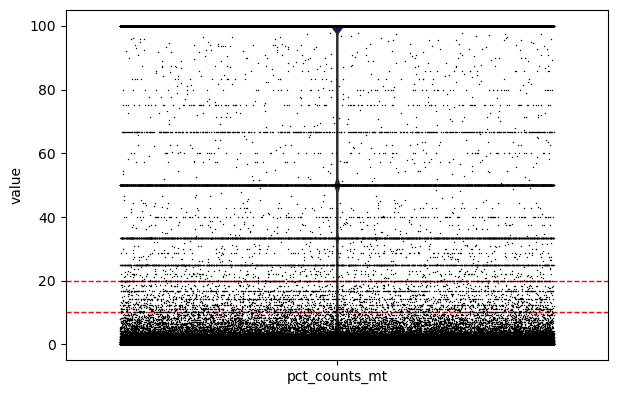

In [11]:
# Plot the violin plot
ax = sc.pl.violin(adata1, "pct_counts_mt", jitter=0.4, log=False, color='darkblue', show=False)

# Add horizontal lines for thresholds
thresholds = [10, 20]  # Replace with your desired percentages
for threshold in thresholds:
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.show()

In [12]:
print(adata1.shape)

(1127217, 36601)


In [13]:
adata1 = adata1[adata1.obs['pct_counts_mt'] < 10, :]


(786758, 36601)


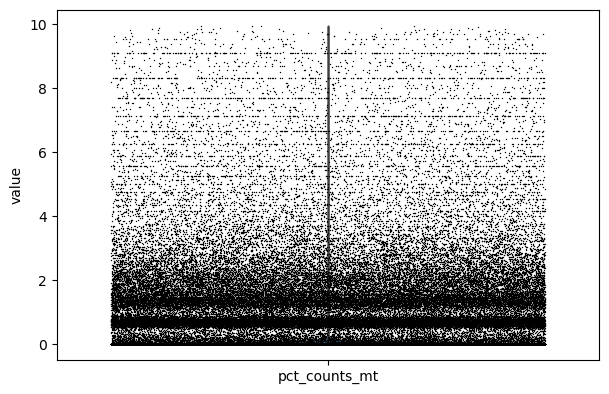

In [14]:
print(adata1.shape)  # Check the number of cells and genes
sc.pl.violin(adata1, ['pct_counts_mt'], jitter=0.4, log=False)


### Filter Cells Based on Total Genes

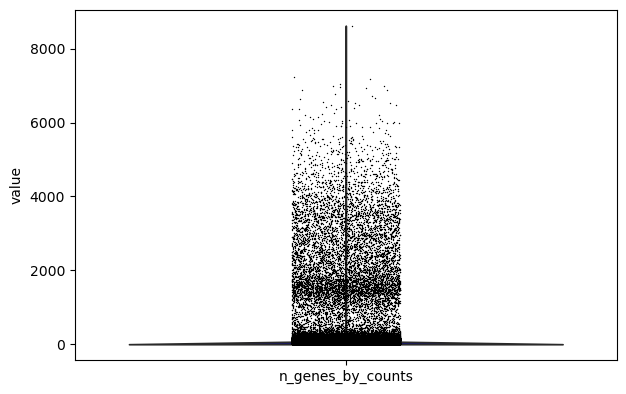

In [15]:
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

In [16]:
adata1 = adata1[(adata1.obs['n_genes_by_counts'] >= 200) & (adata1.obs['n_genes_by_counts'] <= 10000)]

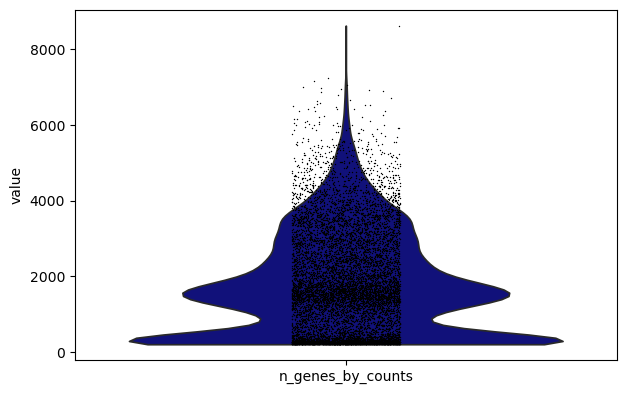

In [17]:
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

In [18]:
print(adata1.shape)

(10282, 36601)


### Filter Cells Based on Total Count

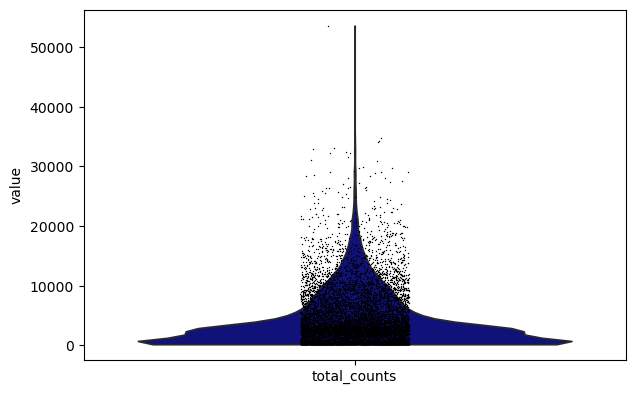

In [19]:
sc.pl.violin(adata1, "total_counts", color='darkblue')

In [20]:
adata1 = adata1[(adata1.obs['total_counts'] >= 1000) &  # Minimum UMIs
    (adata1.obs['total_counts'] <= 80000)]   # Maximum UMIs

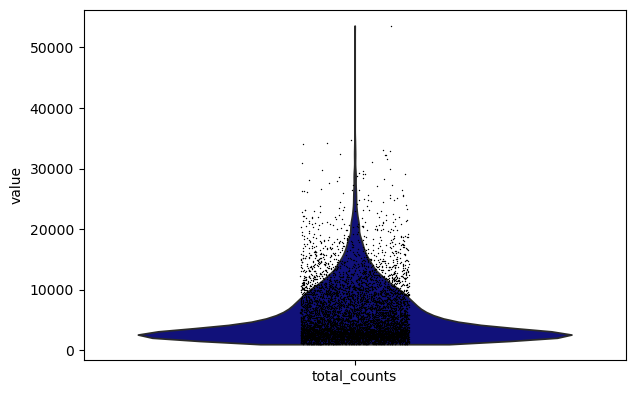

In [21]:
sc.pl.violin(adata1, "total_counts", color='darkblue')

In [22]:
print(adata1.shape)

(7323, 36601)


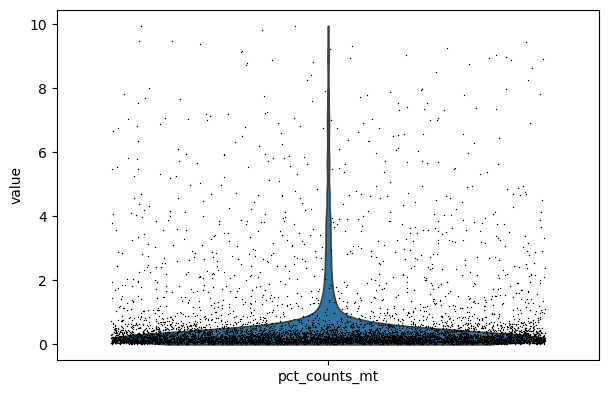

In [23]:
sc.pl.violin(adata1, ['pct_counts_mt'], jitter=0.4, log=False)

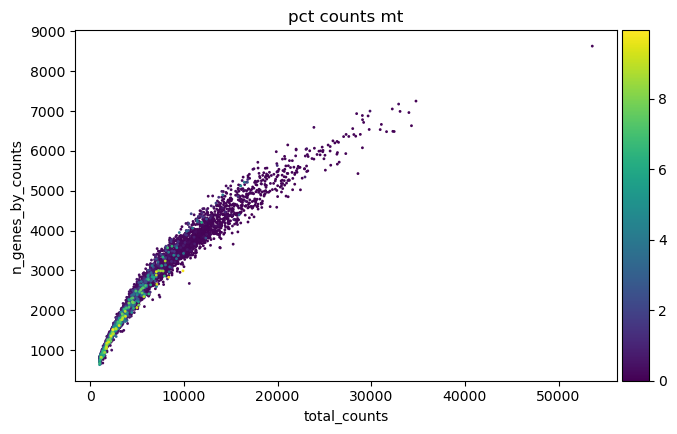

In [24]:
sc.pl.scatter(adata1, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [25]:
print(adata1.shape)

(7323, 36601)


## (SKIP THIS PART!) Filtering the outliers in a data-driven way

Define a function to find outliers in a data-driven way:

In [74]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [75]:
adata1.obs["outlier"] = (
    is_outlier(adata1, "log1p_total_counts", 6)
    | is_outlier(adata1, "log1p_n_genes_by_counts", 6)
    | is_outlier(adata1, "pct_counts_in_top_20_genes", 6)
)
adata1.obs.outlier.value_counts()

outlier
False    10348
True        46
Name: count, dtype: int64

In [76]:
adata1.obs["mt_outlier"] = is_outlier(adata1, "pct_counts_mt", 3) | (
    adata1.obs["pct_counts_mt"] > 8
)
adata1.obs.mt_outlier.value_counts()

mt_outlier
False    7847
True     2547
Name: count, dtype: int64

In [77]:
adata1.obs["mt_outlier"]

AAACCCAAGGCCTAGA-1     True
AAACCCAAGTACTCGT-1    False
AAACCCAAGTGCCTCG-1    False
AAACCCAAGTTCCGGC-1    False
AAACCCACAAGGAGTC-1    False
                      ...  
TTTGTTGGTCCTTTGC-1    False
TTTGTTGTCATTACGG-1     True
TTTGTTGTCCACATAG-1     True
TTTGTTGTCCGACAGC-1     True
TTTGTTGTCTCGTCGT-1    False
Name: mt_outlier, Length: 10394, dtype: bool

## Add the antotations to the objects

In [26]:
metadata = pd.read_csv("Sample1/GSE240822_GBM_ccRCC_RNA_metadata_CPTAC_samples.tsv", sep="\t")
metadata.head()

,Merged_barcode,Barcode,Sample_RNA,Sample_ATAC,Case_ID,Piece_ID,Sample_type,data.type.rna,Chemistry,Cancer,cell_type.harmonized.cancer,Aliquot,GEO.sample
0,ccRCC_C3L-00088-T1_AAACCCAAGACGACTG-1,AAACCCAAGACGACTG-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,Tumor,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC
1,ccRCC_C3L-00088-T1_AAACCCACAAATGATG-1,AAACCCACAAATGATG-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,T-cells,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC
2,ccRCC_C3L-00088-T1_AAACCCACAATCCAGT-1,AAACCCACAATCCAGT-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,Tumor,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC
3,ccRCC_C3L-00088-T1_AAACCCACACAATCTG-1,AAACCCACACAATCTG-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,Tumor,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC
4,ccRCC_C3L-00088-T1_AAACCCACACTCCTTG-1,AAACCCACACTCCTTG-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,Tumor,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC


In [27]:
#Filter only the rows relevant to sample 1.
sample1_code = 'C3L-00004-T1_CPT0001540013_snRNA_ccRCC'

metadata_sample1 = metadata[metadata['GEO.sample'] == sample1_code]
metadata_sample1.shape

(6855, 13)

The following code indicates that there are no duplicates in the Barcodes at the beginning

In [28]:
metadata_sample12 = metadata_sample1.set_index('Barcode')

# Identify duplicated indexes
print(metadata_sample12.index.duplicated())
duplicated_indices = metadata_sample12.index[metadata_sample12.index.duplicated()]
print(duplicated_indices)

[False False False ... False False False]
Index([], dtype='object', name='Barcode')


In [29]:
# Subset relevant columns
metadata_subset = metadata_sample1[["Barcode", "cell_type.harmonized.cancer"]]
metadata_subset.shape

(6855, 2)

In [30]:
barcodes = metadata_subset['Barcode']

In [37]:
metadata_subset = metadata_subset.set_index('Barcode')

In [38]:
adata1.shape

(7323, 36601)

We keep only the cells with anotation

In [39]:
# Filter the cells in adata that also have anotation in the metadata file
adata1_filtered = adata1[adata1.obs.index.isin(barcodes)].copy()
print(adata1_filtered)
print(adata1_filtered.obs.index)

AnnData object with n_obs × n_vars = 6855 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
Index(['AAACCCAAGTACTCGT-1', 'AAACCCAAGTGCCTCG-1', 'AAACCCAAGTTCCGGC-1',
       'AAACCCACACTGATTG-1', 'AAACCCACAGATCATC-1', 'AAACCCACAGTCGGAA-1',
       'AAACCCACATCGAAGG-1', 'AAACCCAGTCAATCTG-1', 'AAACCCAGTCACTCAA-1',
       'AAACCCAGTGCTCTTC-1',
       ...
       'TTTGGTTAGGTACATA-1', 'TTTGGTTAGTATGATG-1', 'TTTGGTTCAGCTACTA-1',
       'TTTGGTTGTAGCGAGT-1', 'TTTGGTTGTCCAGAAG-1', 'TTTGGTTGTGGGCTCT-1',
       'TTTGGTTTCAAGATAG-1', 'TTTGTTGAGCTCCGAC-1', 'TTTGTTGCATATCTCT-1',

We filtered out 468 cells that do not have anotation

In [40]:
# Merge the datasets
adata1_ann = pd.merge(adata1_filtered.obs, metadata_subset, left_index=True, right_on='Barcode', how='inner')
print(adata1_ann)

                    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
Barcode                                                                        
AAACCCAAGTACTCGT-1               1221                 7.108244          1756   
AAACCCAAGTGCCTCG-1               1559                 7.352441          2526   
AAACCCAAGTTCCGGC-1               1017                 6.925595          1338   
AAACCCACACTGATTG-1               4892                 8.495561         15739   
AAACCCACAGATCATC-1               3239                 8.083329          7972   
...                               ...                      ...           ...   
TTTGGTTGTGGGCTCT-1               1970                 7.586296          3958   
TTTGGTTTCAAGATAG-1               1251                 7.132498          1913   
TTTGTTGAGCTCCGAC-1               1074                 6.980076          1568   
TTTGTTGCATATCTCT-1               1729                 7.455877          2958   
TTTGTTGGTCCTTTGC-1               4131   

In [41]:
# Set the merged dataset as the obs of the filtered adata
adata1_filtered.obs = adata1_ann
adata1_filtered.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,cell_type.harmonized.cancer
Barcode,,,,,,,,,,,,,,,
AAACCCAAGTACTCGT-1,1221,7.108244,1756,7.471363,9.794989,7,2.079442,0.398633,27,3.332205,1.537585,0,0.000000,0.000000,T-cells
AAACCCAAGTGCCTCG-1,1559,7.352441,2526,7.834788,9.817894,5,1.791759,0.197941,26,3.295837,1.029295,0,0.000000,0.000000,T-cells
AAACCCAAGTTCCGGC-1,1017,6.925595,1338,7.199678,10.687593,1,0.693147,0.074738,6,1.945910,0.448430,0,0.000000,0.000000,Tumor
AAACCCACACTGATTG-1,4892,8.495561,15739,9.663961,12.211703,5,1.791759,0.031768,56,4.043051,0.355804,2,1.098612,0.012707,Tumor
AAACCCACAGATCATC-1,3239,8.083329,7972,8.983816,10.612142,23,3.178054,0.288510,50,3.931826,0.627195,1,0.693147,0.012544,Macrophages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTGGGCTCT-1,1970,7.586296,3958,8.283747,13.996968,13,2.639057,0.328449,35,3.583519,0.884285,0,0.000000,0.000000,T-cells
TTTGGTTTCAAGATAG-1,1251,7.132498,1913,7.556951,8.991113,6,1.945910,0.313643,24,3.218876,1.254574,0,0.000000,0.000000,T-cells
TTTGTTGAGCTCCGAC-1,1074,6.980076,1568,7.358194,10.459184,4,1.609438,0.255102,10,2.397895,0.637755,0,0.000000,0.000000,T-cells


### Normalization

In [42]:
# Normalizing to median total counts
sc.pp.normalize_total(adata1_filtered)
# Logarithmize the data
sc.pp.log1p(adata1_filtered)

### Feature selection

In [43]:
adata1_filtered.shape

(6855, 36601)

In [44]:
sc.pp.highly_variable_genes(adata1_filtered, n_top_genes=2000)

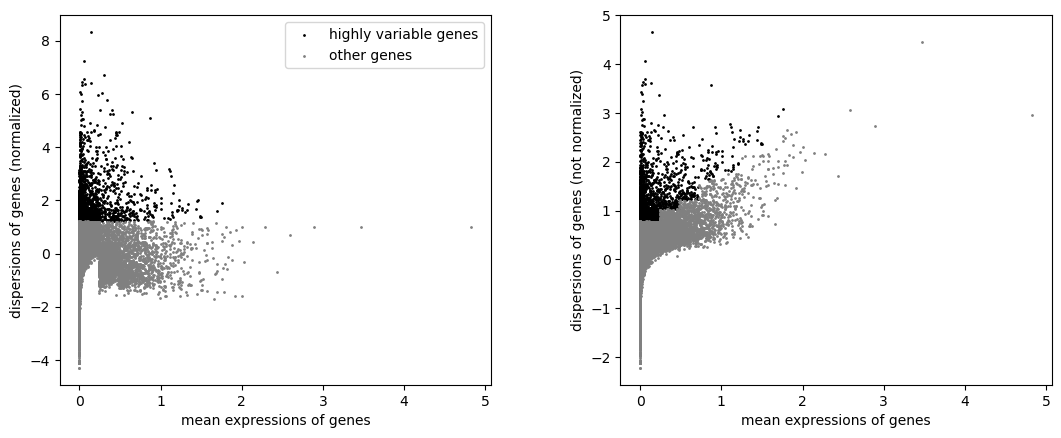

In [45]:
sc.pl.highly_variable_genes(adata1_filtered)

We filter highly variable genes

In [46]:
adata1_filtered = adata1_filtered[:, adata1_filtered.var.highly_variable]

In [47]:
adata1_filtered.shape

(6855, 2000)

### Dimensionality reduction

In [48]:
sc.tl.pca(adata1_filtered)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


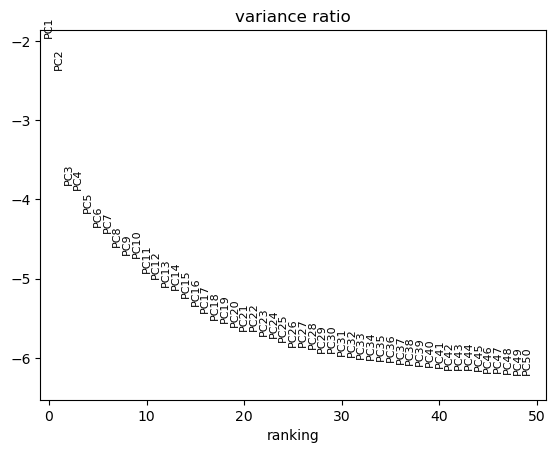

In [49]:
sc.pl.pca_variance_ratio(adata1_filtered, n_pcs=50, log=True)

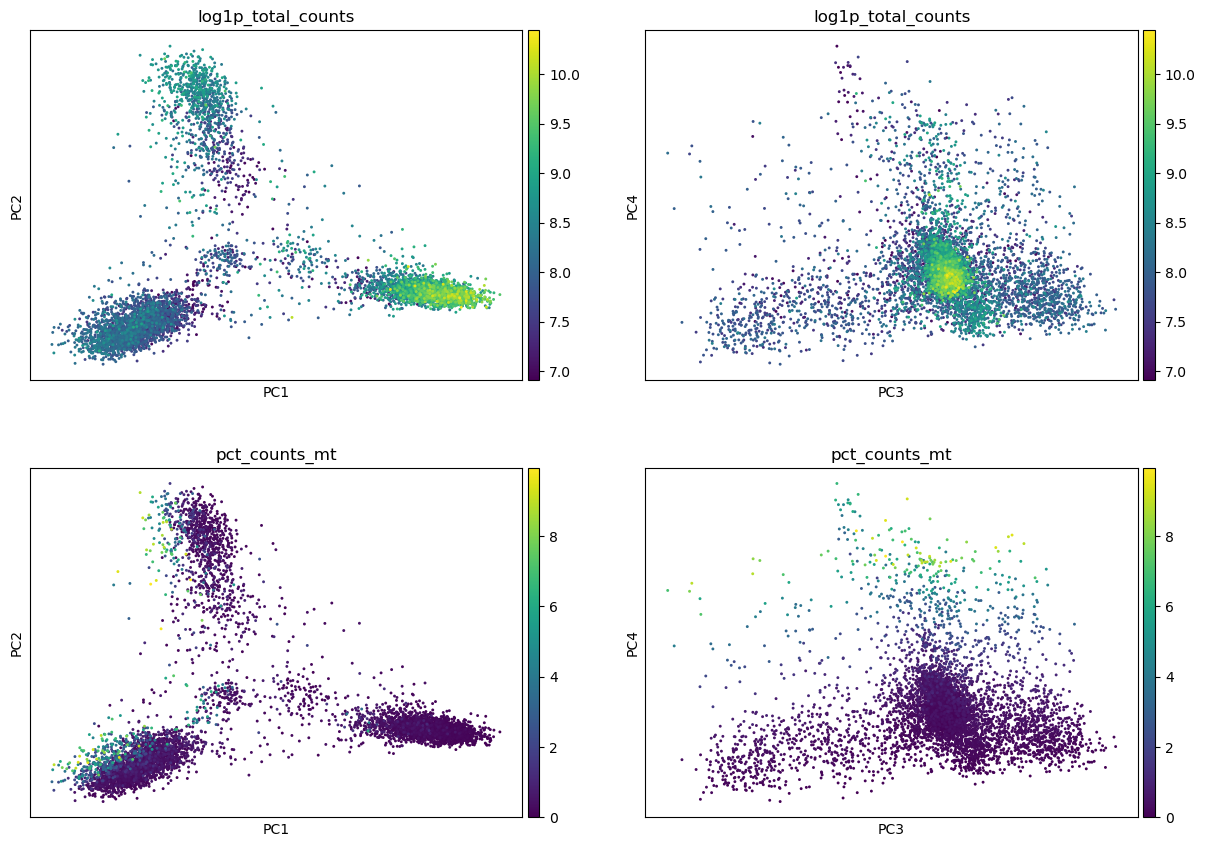

In [50]:
sc.pl.pca(
    adata1_filtered,
    color=["log1p_total_counts"] * 2 + ["pct_counts_mt"] * 2,
    dimensions=[(0, 1), (2, 3)] * 2,
    ncols=2,
    # size=2,
)

### Nearest neighbor graph constuction and visualization

In [51]:
sc.pp.neighbors(adata1_filtered)
sc.tl.umap(adata1_filtered)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


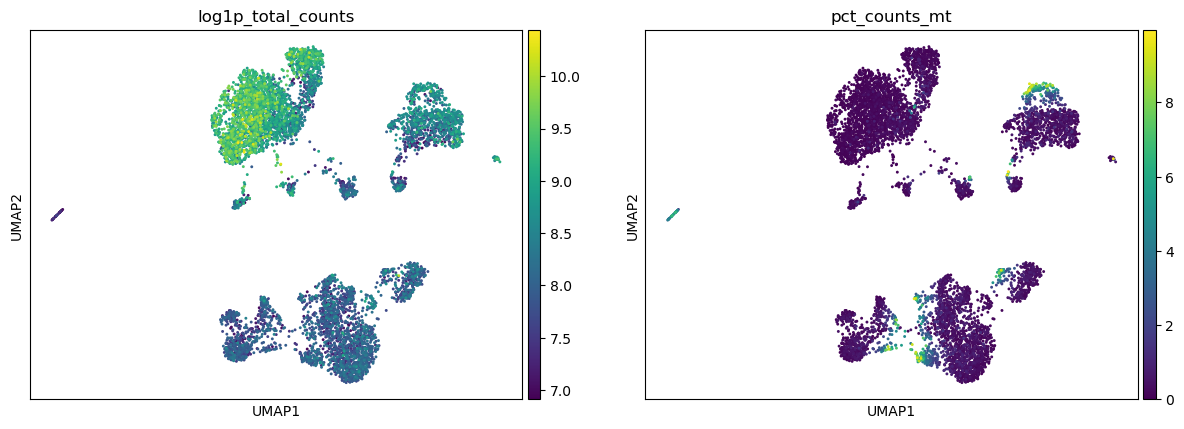

In [52]:
sc.pl.umap(
    adata1_filtered,
    color=["log1p_total_counts", "pct_counts_mt"]
)

### Clustering

In [53]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata1_filtered, n_iterations=2)

C:\Users\gajaj\AppData\Local\Temp\ipykernel_56300\1112479299.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata1_filtered, n_iterations=2)


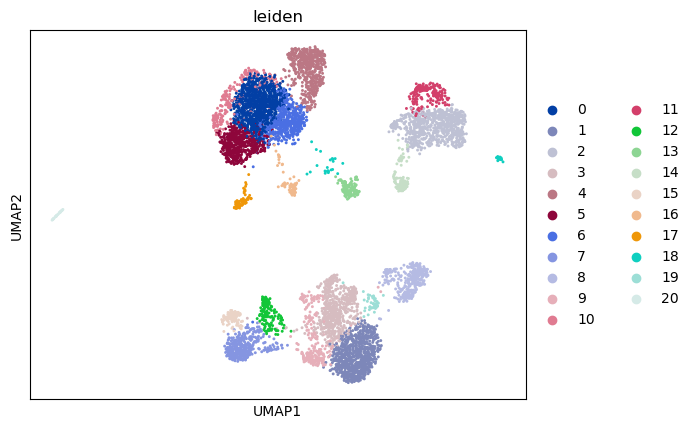

In [54]:
sc.pl.umap(adata1_filtered, color=["leiden"])

### Anotation

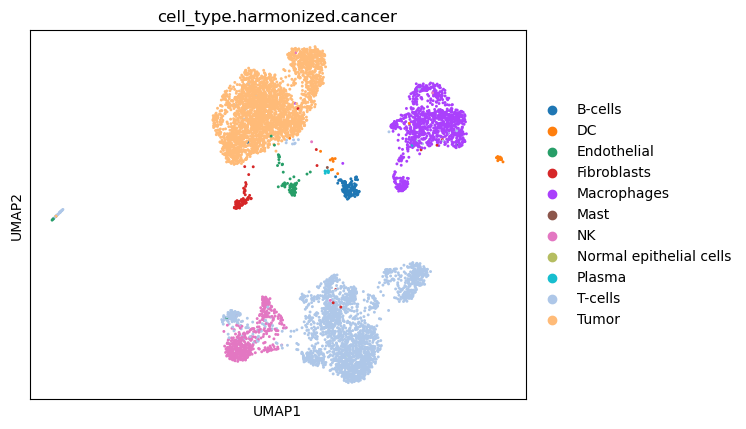

In [55]:
# Draw the umap
sc.pl.umap(
    adata1_filtered,
    color=["cell_type.harmonized.cancer"]
)

# Leave out

## Normalization

Moving back to adata that is not filtered for the anotation

In [16]:
# Normalizing to median total counts
sc.pp.normalize_total(adata1)
# Logarithmize the data
sc.pp.log1p(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


## Feature selection

In [17]:
adata1.shape

(7323, 36601)

In [18]:
sc.pp.highly_variable_genes(adata1, n_top_genes=2000)

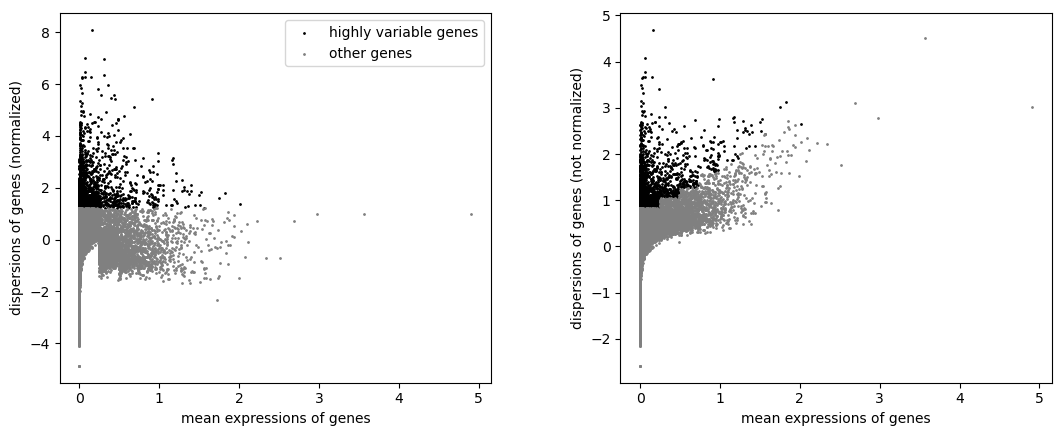

In [19]:
sc.pl.highly_variable_genes(adata1)

In [20]:
adata1 = adata1[:, adata1.var.highly_variable]
adata1

View of AnnData object with n_obs × n_vars = 7323 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

The number of genes changed form 36601 to 2000

## Dimensionality reduction

In [21]:
sc.tl.pca(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


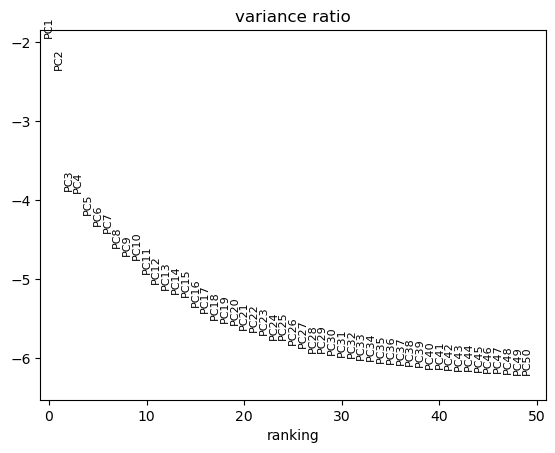

In [22]:
sc.pl.pca_variance_ratio(adata1, n_pcs=50, log=True)

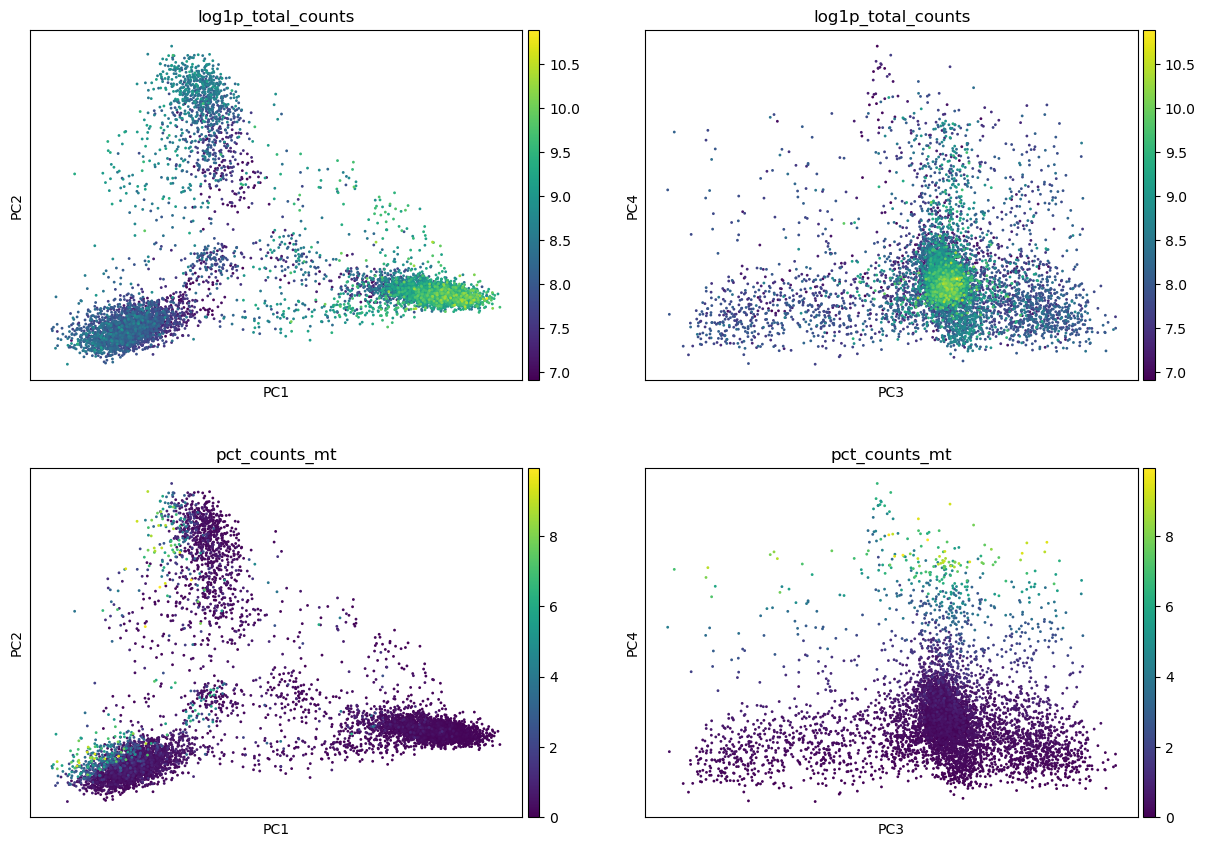

In [23]:
sc.pl.pca(
    adata1,
    color=["log1p_total_counts"] * 2 + ["pct_counts_mt"] * 2,
    dimensions=[(0, 1), (2, 3)] * 2,
    ncols=2,
    # size=2,
)

## Nearest neighbor graph constuction and visualization

In [24]:
sc.pp.neighbors(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
sc.tl.umap(adata1)

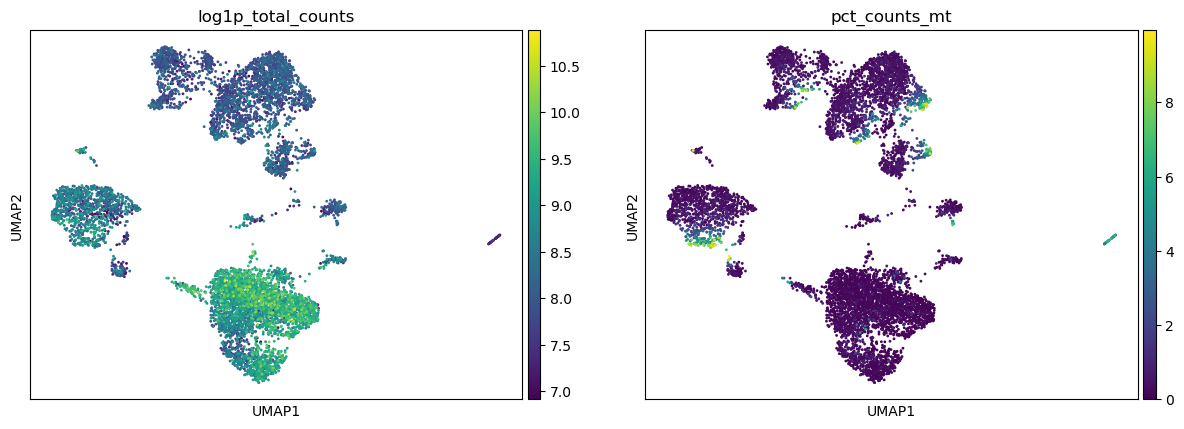

In [26]:
sc.pl.umap(
    adata1,
    color=["log1p_total_counts", "pct_counts_mt"]
)

### Clustering

In [27]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata1, n_iterations=2)

C:\Users\gajaj\AppData\Local\Temp\ipykernel_26684\2380624730.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata1, n_iterations=2)


In [46]:
sc.tl.leiden(adata1_filtered, n_iterations=2)

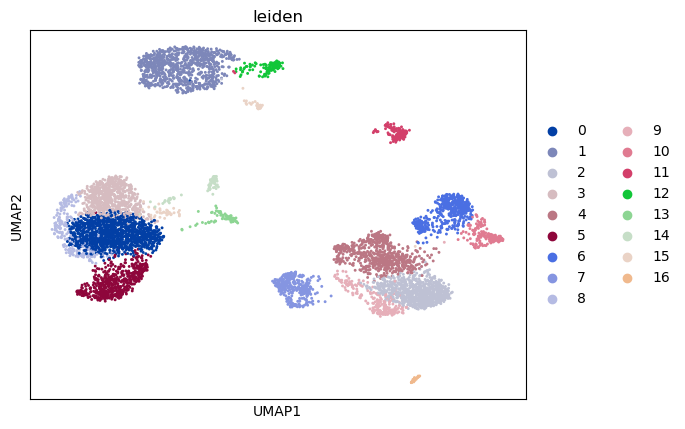

In [47]:
sc.pl.umap(adata1_filtered, color=["leiden"])

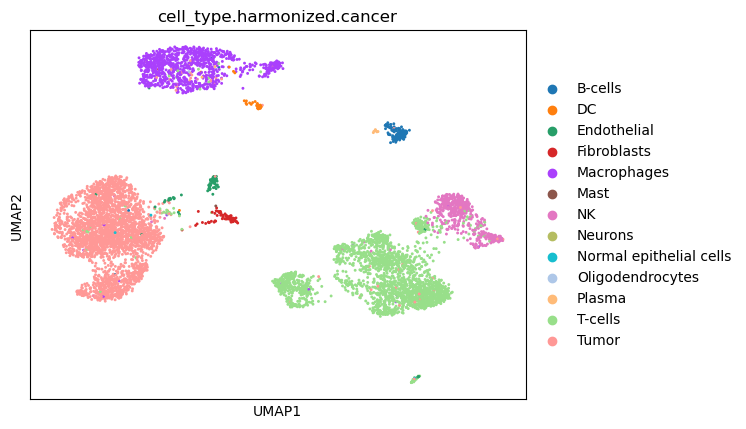

In [48]:
sc.pl.umap(adata1_filtered, color=["cell_type.harmonized.cancer"])

# Create a .tsv file

In [56]:
cell_barcodes = adata1_filtered.obs_names
gene_ids = adata1_filtered.var["gene_ids"]
expression_matrix = adata1_filtered.X

In [57]:
if not isinstance(expression_matrix, np.ndarray):
    expression_matrix = expression_matrix.toarray()  # Convert sparse to dense if neede

In [58]:
# Create a DataFrame for the long-format data
data = pd.DataFrame(
    {
        'barcode': np.repeat(cell_barcodes, len(gene_ids)),
        'gene_id': np.tile(gene_ids, len(cell_barcodes)),
        'expression_count': expression_matrix.flatten()
    }
)

# Preview the resulting DataFrame
print(data.head())

              barcode          gene_id  expression_count
0  AAACCCAAGTACTCGT-1  ENSG00000186891               0.0
1  AAACCCAAGTACTCGT-1  ENSG00000235098               0.0
2  AAACCCAAGTACTCGT-1  ENSG00000187730               0.0
3  AAACCCAAGTACTCGT-1  ENSG00000142611               0.0
4  AAACCCAAGTACTCGT-1  ENSG00000272153               0.0


In [59]:
# Remove rows where expression_count is zero
data = data[data['expression_count'] != 0]

In [60]:
data['expression_count'].max()

5.626053758819446

In [61]:
mean_expression = data['expression_count'].mean()
mean_expression

0.9980042027756146

In [62]:
# Create a new column 'classification' based on the mean
data['classification'] = data['expression_count'].apply(
    lambda x: 'high' if x > mean_expression else 'low'
)
print(data.head)

<bound method NDFrame.head of                      barcode          gene_id  expression_count classification
64        AAACCCAAGTACTCGT-1  ENSG00000184005          1.993568           high
68        AAACCCAAGTACTCGT-1  ENSG00000153898          1.135874           high
76        AAACCCAAGTACTCGT-1  ENSG00000171488          1.135874           high
82        AAACCCAAGTACTCGT-1  ENSG00000079335          2.448370           high
88        AAACCCAAGTACTCGT-1  ENSG00000134242          1.135874           high
...                      ...              ...               ...            ...
13709973  TTTGTTGGTCCTTTGC-1  ENSG00000225689          0.589099            low
13709985  TTTGTTGGTCCTTTGC-1  ENSG00000165246          0.237011            low
13709991  TTTGTTGGTCCTTTGC-1  ENSG00000198804          0.727461            low
13709995  TTTGTTGGTCCTTTGC-1  ENSG00000198938          0.428471            low
13709997  TTTGTTGGTCCTTTGC-1  ENSG00000198886          0.428471            low

[1104687 rows x 4 col

In [63]:
# Reset the index of the DataFrame and drop the old index
data = data.reset_index(drop=True)
print(data.head)

<bound method NDFrame.head of                     barcode          gene_id  expression_count classification
0        AAACCCAAGTACTCGT-1  ENSG00000184005          1.993568           high
1        AAACCCAAGTACTCGT-1  ENSG00000153898          1.135874           high
2        AAACCCAAGTACTCGT-1  ENSG00000171488          1.135874           high
3        AAACCCAAGTACTCGT-1  ENSG00000079335          2.448370           high
4        AAACCCAAGTACTCGT-1  ENSG00000134242          1.135874           high
...                     ...              ...               ...            ...
1104682  TTTGTTGGTCCTTTGC-1  ENSG00000225689          0.589099            low
1104683  TTTGTTGGTCCTTTGC-1  ENSG00000165246          0.237011            low
1104684  TTTGTTGGTCCTTTGC-1  ENSG00000198804          0.727461            low
1104685  TTTGTTGGTCCTTTGC-1  ENSG00000198938          0.428471            low
1104686  TTTGTTGGTCCTTTGC-1  ENSG00000198886          0.428471            low

[1104687 rows x 4 columns]>


In [64]:
data.to_csv('/Users/gajaj/OneDrive/Documents/TUM/computational_single_cell/Gene-expression-changes-from-CNV/preprocessing/Sample1_outs/data_filtered.tsv', sep='\t', index=False)

In [65]:
# Count the number of rows for each classification
classification_counts = data["classification"].value_counts()

print(classification_counts)


classification
low     655672
high    449015
Name: count, dtype: int64


In [69]:
data_barcodes = data['barcode']
data_barcodes

0          AAACCCAAGTACTCGT-1
1          AAACCCAAGTACTCGT-1
2          AAACCCAAGTACTCGT-1
3          AAACCCAAGTACTCGT-1
4          AAACCCAAGTACTCGT-1
                  ...        
1104682    TTTGTTGGTCCTTTGC-1
1104683    TTTGTTGGTCCTTTGC-1
1104684    TTTGTTGGTCCTTTGC-1
1104685    TTTGTTGGTCCTTTGC-1
1104686    TTTGTTGGTCCTTTGC-1
Name: barcode, Length: 1104687, dtype: object

TODO: plot the expressions, and plot by the cell type
two datasets, one with zeros one without, 0 own cathegory

maybe instead of mean choose median

if its normal, means makes sense, otherwise not

find file gff, gpf

Atac preprocessing you are interested in the peaks that are in the regions of genes that you get from the gpf file

Atac preprocessing:

In [71]:
adata1_filtered.var

,gene_ids,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
TNFRSF18,ENSG00000186891,False,False,False,348,0.000381,0.000381,99.969128,430,6.066108,True,0.044395,0.825395,1.295311
ANKRD65,ENSG00000235098,False,False,False,22,0.000020,0.000020,99.998048,23,3.178054,True,0.002068,0.923559,1.475305
GABRD,ENSG00000187730,False,False,False,44,0.000042,0.000042,99.996097,47,3.871201,True,0.002522,1.018140,1.648731
PRDM16,ENSG00000142611,False,False,False,16,0.000030,0.000030,99.998581,34,3.555348,True,0.004054,2.550382,4.458271
AL365330.1,ENSG00000272153,False,False,False,2,0.000002,0.000002,99.999823,2,1.098612,True,0.000347,0.866244,1.370212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-CO3,ENSG00000198938,True,False,False,32314,0.057449,0.055859,97.133294,64757,11.078413,True,1.443917,2.639574,1.986743
MT-ND3,ENSG00000198840,True,False,False,19624,0.034570,0.033986,98.259075,38968,10.570522,True,1.125922,2.620282,2.899510
MT-ND4,ENSG00000198886,True,False,False,18544,0.028924,0.028514,98.354886,32604,10.392221,True,0.930788,2.166255,2.298666
MT-ND5,ENSG00000198786,True,False,False,7775,0.009572,0.009527,99.310248,10790,9.286468,True,0.443947,1.153560,1.561673
